**Dirchelet Multinomial Model**
1. Multivariate Bayesian Case for Binomial
2. Ex: For example we have a multi sided di, we can model this with dirchelet Multinomial
3. The dirchelet function is a conjugate prior of the Multinomial

**SCODA limitations**
1. Uses a log-linear relationship between covariates (x) and cell abundance (Y)
2. for continuous biological covariates, this relationship may not be true (gene expression, other metadata)

In [1]:
!pip install sccoda pertpy

  Using cached scCODA-0.1.9-py3-none-any.whl.metadata (4.2 kB)
  Using cached pertpy-0.9.4-py3-none-any.whl.metadata (6.9 kB)
  Using cached tensorflow_probability-0.24.0-py2.py3-none-any.whl.metadata (13 kB)
  Using cached arviz-0.19.0-py3-none-any.whl.metadata (8.9 kB)
  Using cached decoupler-1.8.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached lamin_utils-0.13.4-py2.py3-none-any.whl.metadata (980 bytes)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached PubChemPy-1.0.4-py3-none-any.whl
  Using cached scikit_misc-0.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.0 kB)
  Using cached scvi_tools-1.1.6.post2-py3-none-any.whl.metadata (18 kB)
  Using cached dm_tree-0.1.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.9 kB)
  Using cached xarray-2024.9.0-py3-none-any.whl.metadata (11 kB)
  Using cached h5netcdf-1.3.0-py3-none-any.whl.metadata (13 kB)
  Using cached xarray_einstats-0.7.0-py3-none-any.wh

In [6]:
!pip install toytree arviz ete3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 70.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.1/269.1 kB 30.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 382.8/382.8 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 76.3 MB/s eta 0:00:00
  Created wheel for ete3: filename=ete3-3.1.3-py3-none-any.whl size=2273785 sha256=14f9ae9371575b1fcef846b98c72c50e8989c0dc137aeba849a1959a192df56d
  Stored in directory: /home/sagemaker-user/.cache/pip/wheels/a0/72/00/1982bd848e52b03079dbf800900120bc1c20e92e9a1216e525
  Created wheel for toyplot: filename=toyplot-1.0.3-py3-none-any.whl size=284023 sha256=feea1061f10c64d98c6aeea1228e053eccb755c2010e2686e1388de5b005411d
  Stored in 

In [1]:
import warnings

import pandas as pd

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

import scanpy as sc
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import altair as alt
import pertpy as pt

2024-09-18 01:13:25.058248: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
adata = pt.dt.haber_2017_regions()

In [3]:
sccoda_model  =  pt.tl.Sccoda()
sccoda_data   =  sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="cell_label",
    sample_identifier="batch",
    covariate_obs=["condition"],
)
sccoda_data

MuData object with n_obs × n_vars = 9852 × 15223
  2 modalities
    rna:	9842 x 15215
      obs:	'batch', 'barcode', 'condition', 'cell_label', 'scCODA_sample_id'
    coda:	10 x 8
      obs:	'batch', 'condition'
      var:	'n_cells'

In [5]:
adata

AnnData object with n_obs × n_vars = 9842 × 15215
    obs: 'batch', 'barcode', 'condition', 'cell_label', 'scCODA_sample_id'

In [7]:
help(pt.pl)

Help on package pertpy.plot in pertpy:

NAME
    pertpy.plot

PACKAGE CONTENTS


FILE
    /opt/conda/lib/python3.10/site-packages/pertpy/plot/__init__.py




In [9]:
dir(sccoda_data)

['X',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_axis',
 '_check_changed_attr_names',
 '_check_duplicated_attr_names',
 '_check_duplicated_names',
 '_check_intersecting_attr_names',
 '_create_global_attr_index',
 '_find_unique_colnames',
 '_gen_repr',
 '_init_as_actual',
 '_init_as_view',
 '_init_common',
 '_init_from_dict_',
 '_mudata_ref',
 '_obs',
 '_obshash',
 '_obsm',
 '_obsmap',
 '_obsp',
 '_pull_attr',
 '_push_attr',
 '_repr_html_',
 '_sanitize',
 '_shrink_attr',
 '_uns',
 '_update_attr',
 '_update_attr_legacy',
 '_var',
 '_varhash',
 '_varm',
 '_varmap',
 '_varp',
 'axis',
 'copy',
 'file',
 'filename',
 'is_view',
 'isbacked'

In [12]:
boxplot_data = adata.to_df()

1. For each condition, we want to see to boxplots for each cell type

In [25]:
adata.obs

,batch,barcode,condition,cell_label,scCODA_sample_id
index,,,,,
B1_AAACATACCACAAC_Control_Enterocyte.Progenitor,B1,AAACATACCACAAC,Control,Enterocyte.Progenitor,B1
B1_AAACGCACGAGGAC_Control_Stem,B1,AAACGCACGAGGAC,Control,Stem,B1
B1_AAACGCACTAGCCA_Control_Stem,B1,AAACGCACTAGCCA,Control,Stem,B1
B1_AAACGCACTGTCCC_Control_Stem,B1,AAACGCACTGTCCC,Control,Stem,B1
B1_AAACTTGACCACCT_Control_Enterocyte.Progenitor,B1,AAACTTGACCACCT,Control,Enterocyte.Progenitor,B1
...,...,...,...,...,...
B10_TTTCACGACAAGCT_Salmonella_TA,B10,TTTCACGACAAGCT,Salmonella,TA,B10
B10_TTTCAGTGAGGCGA_Salmonella_Enterocyte,B10,TTTCAGTGAGGCGA,Salmonella,Enterocyte,B10
B10_TTTCAGTGCGACAT_Salmonella_Stem,B10,TTTCAGTGCGACAT,Salmonella,Stem,B10


In [23]:
proportions

NameError: name 'proportions' is not defined

In [48]:
adata.obs

,batch,barcode,condition,cell_label,scCODA_sample_id
index,,,,,
B1_AAACATACCACAAC_Control_Enterocyte.Progenitor,B1,AAACATACCACAAC,Control,Enterocyte.Progenitor,B1
B1_AAACGCACGAGGAC_Control_Stem,B1,AAACGCACGAGGAC,Control,Stem,B1
B1_AAACGCACTAGCCA_Control_Stem,B1,AAACGCACTAGCCA,Control,Stem,B1
B1_AAACGCACTGTCCC_Control_Stem,B1,AAACGCACTGTCCC,Control,Stem,B1
B1_AAACTTGACCACCT_Control_Enterocyte.Progenitor,B1,AAACTTGACCACCT,Control,Enterocyte.Progenitor,B1
...,...,...,...,...,...
B10_TTTCACGACAAGCT_Salmonella_TA,B10,TTTCACGACAAGCT,Salmonella,TA,B10
B10_TTTCAGTGAGGCGA_Salmonella_Enterocyte,B10,TTTCAGTGAGGCGA,Salmonella,Enterocyte,B10
B10_TTTCAGTGCGACAT_Salmonella_Stem,B10,TTTCAGTGCGACAT,Salmonella,Stem,B10


Text(0.5, 0, 'Condition')

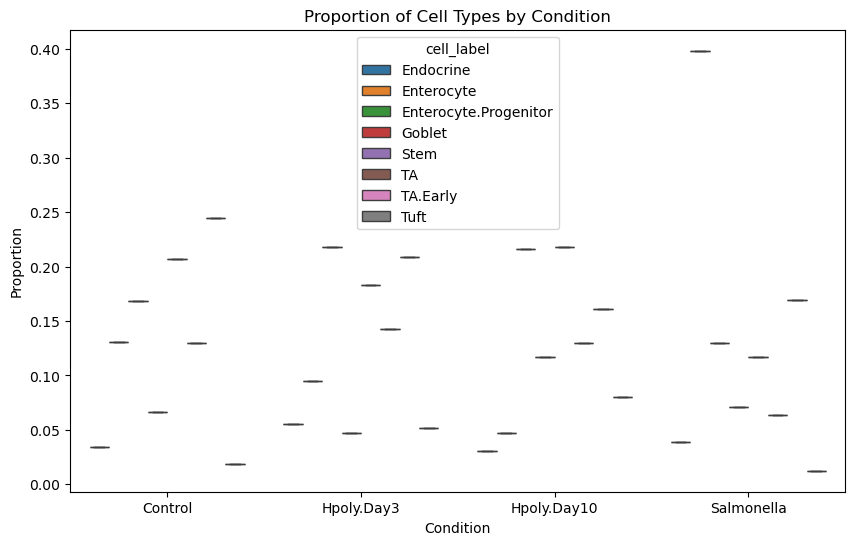

In [79]:
# Calculate proportions of each cell type within each condition

cell_label          = 'cell_label'
condition_label     = 'condition'
proportions         = adata.obs.groupby([condition_label, cell_label]).size().groupby(level=0).apply(lambda x: x / float(x.sum()))
proportions         = proportions.droplevel(level = 1).reset_index()
proportions.columns = [condition_label, cell_label, 'proportion']

# Plotting the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=condition_label, y='proportion', hue=cell_label, data=proportions)

# # Adding labels and title
plt.title('Proportion of Cell Types by Condition')
plt.ylabel('Proportion')
plt.xlabel('Condition')

# plt.show()

In [101]:
merged_df = boxplot_data.merge(adata.obs[['condition', 'cell_label']], left_index=True, right_index=True)
merged_df = merged_df.groupby(['cell_label', 'condition']).sum()
merged_df = merged_df.reset_index()
merged_df = merged_df.melt(id_vars=['cell_label', 'condition'], var_name='gene', value_name='expression')


**Last step plot the proportion as a bar plot**

In [106]:
unique_labels       = merged_df['cell_label'].unique()
unique_conditions   = merged_df['condition'].unique()
combinations = itertools.combinations(unique_labels, unique_conditions)

,cell_label,condition,gene,expression
0,Endocrine,Control,A130010J15Rik,14.0
1,Endocrine,Hpoly.Day3,A130010J15Rik,12.0
2,Endocrine,Hpoly.Day10,A130010J15Rik,12.0
3,Endocrine,Salmonella,A130010J15Rik,7.0
4,Enterocyte,Control,A130010J15Rik,16.0
...,...,...,...,...
486875,TA.Early,Salmonella,Zzz3,47.0
486876,Tuft,Control,Zzz3,7.0
486877,Tuft,Hpoly.Day3,Zzz3,3.0
486878,Tuft,Hpoly.Day10,Zzz3,19.0


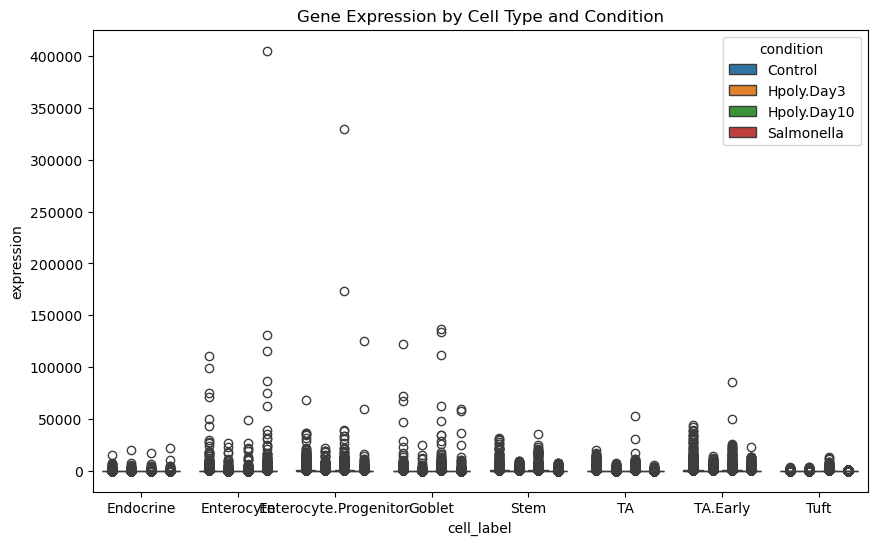

In [105]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cell_label', y='expression', hue='condition', data=merged_df)
plt.title('Gene Expression by Cell Type and Condition')
plt.show()

In [78]:
proportions

,condition,cell_label,0
0,Control,Endocrine,0.034568
1,Control,Enterocyte,0.130864
2,Control,Enterocyte.Progenitor,0.168210
3,Control,Goblet,0.066667
4,Control,Stem,0.206790
5,Control,TA,0.129938
6,Control,TA.Early,0.244444
7,Control,Tuft,0.018519
8,Hpoly.Day3,Endocrine,0.055163
9,Hpoly.Day3,Enterocyte,0.094767


In [65]:
labeled_dictionary = {key[0] + ' ' + key[1]:[key[0], key[1], val] for key, val in adata.obs.groupby([condition_label, cell_label]).size().to_dict().items()}
proportions        = pd.DataFrame(labeled_dictionary.values(), labeled_dictionary.keys(), columns = ['condition', 'cell_label', 'proportion'])
proportions['proportion'] = proportions['proportion'].apply(lambda x: x / float(x.sum()))

AttributeError: 'int' object has no attribute 'sum'

In [63]:
proportions

,proportion
Control Endocrine,0.011380
Control Enterocyte,0.043081
Control Enterocyte.Progenitor,0.055375
Control Goblet,0.021947
Control Stem,0.068076
Control TA,0.042776
Control TA.Early,0.080471
Control Tuft,0.006096
Hpoly.Day3 Endocrine,0.011888
Hpoly.Day3 Enterocyte,0.020423


In [47]:
pd.DataFrame(proportions)

0
condition   condition   cell_label                     
Control     Control     Endocrine              0.034568
                        Enterocyte             0.130864
                        Enterocyte.Progenitor  0.168210
                        Goblet                 0.066667
                        Stem                   0.206790
                        TA                     0.129938
                        TA.Early               0.244444
                        Tuft                   0.018519
Hpoly.Day3  Hpoly.Day3  Endocrine              0.055163
                        Enterocyte             0.094767
                        Enterocyte.Progenitor  0.217822
                        Goblet                 0.046676
                        Stem                   0.182933
                        TA                     0.142386
                        TA.Early               0.208392
                        Tuft                   0.051862
Hpoly.Day10 Hpoly.Day10 Endocrine              0.030247
                        Enterocyte             0.047215
                        Enterocyte.Progenitor  0.216156
                        Goblet                 0.116931
                        Stem                   0.218370
                        TA                     0.130210
                        TA.Early               0.160826
                        Tuft                   0.080044
Salmonella  Salmonella  Endocrine              0.038983
                        Enterocyte             0.398305
                        Enterocyte.Progenitor  0.129379
                        Goblet                 0.071186
                        Stem                   0.116949
                        TA                     0.063277
                        TA.Early               0.169492
                        Tuft                   0.012429